In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes_dataset__2019.csv')
df

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0.0,0,not much,yes
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,quite often,yes
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,not much,no
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,0,not much,no


In [3]:
df.Stress.value_counts()

sometimes     564
very often    164
not at all    136
always         88
Name: Stress, dtype: int64

In [4]:
# ver percentualmente dividindo pela quantidade de linhas na tabela
df.Stress.value_counts() / df.shape[0]

sometimes     0.592437
very often    0.172269
not at all    0.142857
always        0.092437
Name: Stress, dtype: float64

In [5]:
# dropna=False exibe a quantidade de campos not a number
df.Pregancies.value_counts(dropna=False)

0.0    754
2.0     64
3.0     60
NaN     42
1.0     28
4.0      4
Name: Pregancies, dtype: int64

In [6]:
df.Diabetic.value_counts(dropna=False)

no     684
yes    266
 no      1
NaN      1
Name: Diabetic, dtype: int64

In [7]:
df.Gender.value_counts(dropna=False)

Male      580
Female    372
Name: Gender, dtype: int64

In [8]:
df.Stress.value_counts()

sometimes     564
very often    164
not at all    136
always         88
Name: Stress, dtype: int64

In [9]:
df.loc[pd.isnull(df.BMI), 'BMI']

113   NaN
116   NaN
121   NaN
122   NaN
Name: BMI, dtype: float64

In [10]:
# preprocessamento

df.loc[pd.isnull(df.BMI), 'BMI'] = df.BMI.mean()
df.loc[pd.isnull(df.Pregancies), 'Pregancies'] = 0
df.loc[pd.isnull(df.Pdiabetes), 'Pdiabetes'] = 0
df.loc[pd.isnull(df.Diabetic), 'Diabetic'] = 'no'
df.loc[:, 'Diabetic'] = df.Diabetic.replace(' no', 'no')
df.loc[:, 'Pdiabetes'] = df.Pdiabetes.replace(0, 'no')
df.loc[:, 'RegularMedicine'] = df.RegularMedicine.replace('o', 'no')
df.loc[:, 'BPLevel'] = df.BPLevel.replace('normal ', 'normal').replace('High', 'high').replace('Low', 'low')

In [11]:
df.Diabetic.value_counts(dropna=False)

no     686
yes    266
Name: Diabetic, dtype: int64

In [12]:
df

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0.0,0,not much,yes
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,quite often,yes
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,not much,no
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,0,not much,no


In [13]:
# transformando em colunas dummy

In [14]:
df_d = pd.get_dummies(df)

In [15]:
df_d

,BMI,Sleep,SoundSleep,Pregancies,Age_40-49,Age_50-59,Age_60 or older,Age_less than 40,Gender_Female,Gender_Male,...,BPLevel_high,BPLevel_low,BPLevel_normal,Pdiabetes_0,Pdiabetes_no,Pdiabetes_yes,UriationFreq_not much,UriationFreq_quite often,Diabetic_no,Diabetic_yes
0,39.0,8,6,0.0,0,1,0,0,0,1,...,1,0,0,1,0,0,1,0,1,0
1,28.0,8,6,0.0,0,1,0,0,0,1,...,0,0,1,1,0,0,1,0,1,0
2,24.0,6,6,0.0,1,0,0,0,0,1,...,0,0,1,1,0,0,1,0,1,0
3,23.0,8,6,0.0,0,1,0,0,0,1,...,0,0,1,1,0,0,1,0,1,0
4,27.0,8,8,0.0,1,0,0,0,0,1,...,0,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,25.0,8,6,0.0,0,0,0,1,0,1,...,0,0,1,1,0,0,1,0,0,1
948,27.0,6,5,0.0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,1
949,23.0,6,5,0.0,0,0,1,0,0,1,...,1,0,0,1,0,0,1,0,1,0
950,27.0,6,5,0.0,0,0,1,0,0,1,...,1,0,0,1,0,0,1,0,1,0


In [16]:
# com este código somamos todos os valores numericos desta linha
df_d.sum(axis=1)

0      67.0
1      56.0
2      50.0
3      51.0
4      57.0
       ... 
947    53.0
948    52.0
949    48.0
950    52.0
951    57.0
Length: 952, dtype: float64

In [20]:
# com base na soma de cada linha dividimos a mesma
X = df_d.div( df_d.sum(axis=1), axis='rows' )
X

,BMI,Sleep,SoundSleep,Pregancies,Age_40-49,Age_50-59,Age_60 or older,Age_less than 40,Gender_Female,Gender_Male,...,BPLevel_high,BPLevel_low,BPLevel_normal,Pdiabetes_0,Pdiabetes_no,Pdiabetes_yes,UriationFreq_not much,UriationFreq_quite often,Diabetic_no,Diabetic_yes
0,0.582090,0.119403,0.089552,0.000000,0.000000,0.014925,0.000000,0.000000,0.000000,0.014925,...,0.014925,0.0,0.000000,0.014925,0.0,0.0,0.014925,0.000000,0.014925,0.000000
1,0.500000,0.142857,0.107143,0.000000,0.000000,0.017857,0.000000,0.000000,0.000000,0.017857,...,0.000000,0.0,0.017857,0.017857,0.0,0.0,0.017857,0.000000,0.017857,0.000000
2,0.480000,0.120000,0.120000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.020000,...,0.000000,0.0,0.020000,0.020000,0.0,0.0,0.020000,0.000000,0.020000,0.000000
3,0.450980,0.156863,0.117647,0.000000,0.000000,0.019608,0.000000,0.000000,0.000000,0.019608,...,0.000000,0.0,0.019608,0.019608,0.0,0.0,0.019608,0.000000,0.019608,0.000000
4,0.473684,0.140351,0.140351,0.000000,0.017544,0.000000,0.000000,0.000000,0.000000,0.017544,...,0.000000,0.0,0.017544,0.017544,0.0,0.0,0.017544,0.000000,0.017544,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,0.471698,0.150943,0.113208,0.000000,0.000000,0.000000,0.000000,0.018868,0.000000,0.018868,...,0.000000,0.0,0.018868,0.018868,0.0,0.0,0.018868,0.000000,0.000000,0.018868
948,0.519231,0.115385,0.096154,0.000000,0.000000,0.000000,0.019231,0.000000,0.000000,0.019231,...,0.019231,0.0,0.000000,0.019231,0.0,0.0,0.000000,0.019231,0.000000,0.019231
949,0.479167,0.125000,0.104167,0.000000,0.000000,0.000000,0.020833,0.000000,0.000000,0.020833,...,0.020833,0.0,0.000000,0.020833,0.0,0.0,0.020833,0.000000,0.020833,0.000000
950,0.519231,0.115385,0.096154,0.000000,0.000000,0.000000,0.019231,0.000000,0.000000,0.019231,...,0.019231,0.0,0.000000,0.019231,0.0,0.0,0.019231,0.000000,0.019231,0.000000


## Grouping

In [21]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=8)
km.fit_predict(X)

array([5, 1, 1, 3, 1, 4, 4, 4, 3, 4, 4, 1, 3, 4, 4, 2, 3, 1, 4, 4, 1, 2,
       2, 0, 4, 4, 4, 1, 2, 0, 1, 0, 2, 2, 3, 4, 3, 3, 3, 3, 1, 1, 5, 3,
       3, 3, 5, 5, 5, 2, 3, 7, 3, 1, 2, 2, 4, 6, 3, 4, 4, 6, 4, 4, 6, 3,
       3, 2, 2, 2, 3, 0, 3, 2, 2, 3, 3, 3, 6, 2, 1, 3, 3, 6, 6, 1, 7, 3,
       6, 7, 7, 1, 4, 4, 6, 1, 3, 7, 4, 1, 1, 1, 4, 0, 0, 3, 3, 2, 2, 4,
       2, 6, 2, 1, 1, 7, 6, 7, 7, 7, 3, 2, 1, 6, 5, 6, 1, 2, 0, 3, 6, 1,
       3, 6, 4, 1, 4, 1, 4, 4, 4, 1, 6, 6, 6, 6, 5, 6, 1, 1, 6, 6, 6, 6,
       6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5,
       6, 6, 0, 3, 0, 3, 3, 4, 4, 4, 1, 4, 1, 1, 4, 1, 4, 4, 1, 1, 1, 4,
       4, 6, 7, 7, 1, 6, 1, 4, 7, 7, 6, 7, 1, 6, 4, 1, 1, 6, 0, 1, 4, 3,
       1, 1, 2, 5, 5, 5, 5, 5, 5, 1, 3, 1, 3, 4, 2, 3, 2, 2, 5, 1, 1, 3,
       3, 4, 4, 4, 3, 4, 4, 1, 3, 4, 4, 2, 3, 1, 4, 4, 1, 2, 2, 0, 4, 4,
       4, 1, 2, 0, 1, 0, 2, 2, 3, 4, 3, 3, 3, 3, 1, 1, 5, 3, 3, 3, 5, 5,
       5, 2, 3, 7, 3, 1, 2, 2, 4, 6, 3, 4, 4, 6, 4,

In [25]:
# calcular o melhor número de cluster
# gráfico de cotovelo | temos que pegar o valor presente no cotovelo do gráfico

distortions = []
n_clusters = range(2, 15)
for n_clus in n_clusters:
    print(n_clus)
    # inertia_: retorna a distancia entre os clusters
    distortions.append(KMeans(n_clusters=n_clus, max_iter=10_000, n_init=100, random_state=61658).fit(X).inertia_)

2
3
4
5
6
7
8
9
10
11
12
13
14


In [26]:
distortions

[4.547971422987054,
 3.7519605493165797,
 3.4098867556884325,
 3.2234223249550955,
 3.072613776202291,
 2.92220545988138,
 2.79613225073551,
 2.6908389784288405,
 2.5986259255949333,
 2.5047024179854995,
 2.4509126521284657,
 2.406182657679164,
 2.35999427164756]

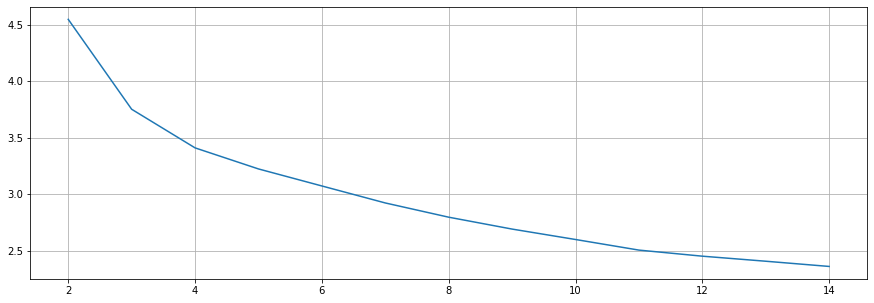

In [27]:
# grafico de cotovelo
# pegamos o valor contido no cotovelo do gráfico para escolher o número de clusters

plt.figure(figsize=(15,5))
plt.plot(n_clusters, distortions)
plt.grid()

In [29]:
km = KMeans(n_clusters=4, max_iter=10_000, n_init=100, random_state=61658)
X_t = km.fit_predict(X)
X_t

array([2, 1, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 1, 0, 0, 3, 0, 0, 1,
       1, 3, 0, 3, 0, 1, 1, 3, 1, 3, 1, 1, 0, 3, 1, 0, 0, 0, 1, 0, 2, 0,
       0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 1, 1, 3, 1, 0, 3, 3, 1, 3, 3, 1, 0,
       0, 1, 1, 1, 1, 3, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 3, 1, 1, 0, 0, 3, 1, 0, 0, 0, 3, 3, 0, 0, 1, 1, 0,
       1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 2, 2, 0, 1, 3, 0, 1, 1,
       0, 1, 0, 0, 3, 1, 3, 3, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 0, 3, 0, 0, 3, 3, 3, 1, 3, 1, 0, 0, 1, 0, 3, 0, 1, 1, 3,
       3, 1, 0, 0, 1, 2, 1, 3, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 3, 0, 3, 0,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 0,
       0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 1, 0, 0, 3, 0, 0, 1, 1, 3, 0, 3,
       0, 1, 1, 3, 1, 3, 1, 1, 0, 3, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2,
       2, 1, 0, 0, 0, 0, 1, 1, 3, 1, 0, 3, 3, 1, 3,

In [30]:
# adicionando o resultado no nosso dataset
df.loc[:, 'clus'] = X_t
df

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic,clus
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no,2
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no,1
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no,0
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no,0
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0.0,0,not much,yes,0
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,quite often,yes,1
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,not much,no,1
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,0,not much,no,1


In [32]:
# retorna todos os data points onde o clus é igual á 1
df.loc[df.clus==0]

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic,clus
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no,0
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no,0
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no,0
6,less than 40,Male,no,no,one hr or more,24.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no,0
8,40-49,Male,yes,no,one hr or more,23.0,no,no,7,7,no,occasionally,sometimes,normal,0.0,0,not much,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,50-59,Female,yes,no,one hr or more,23.0,no,no,6,5,no,occasionally,sometimes,high,2.0,0,not much,no,0
934,40-49,Male,yes,no,less than half an hr,24.0,no,no,7,5,no,occasionally,sometimes,normal,0.0,0,not much,no,0
944,50-59,Female,no,yes,one hr or more,22.0,no,no,8,5,yes,occasionally,always,normal,3.0,0,not much,yes,0
946,40-49,Male,yes,yes,one hr or more,22.0,no,no,7,6,yes,occasionally,sometimes,high,0.0,0,not much,yes,0


In [33]:
df_d.loc[:, 'clus'] = X_t
df_d

,BMI,Sleep,SoundSleep,Pregancies,Age_40-49,Age_50-59,Age_60 or older,Age_less than 40,Gender_Female,Gender_Male,...,BPLevel_low,BPLevel_normal,Pdiabetes_0,Pdiabetes_no,Pdiabetes_yes,UriationFreq_not much,UriationFreq_quite often,Diabetic_no,Diabetic_yes,clus
0,39.0,8,6,0.0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,1,0,2
1,28.0,8,6,0.0,0,1,0,0,0,1,...,0,1,1,0,0,1,0,1,0,1
2,24.0,6,6,0.0,1,0,0,0,0,1,...,0,1,1,0,0,1,0,1,0,0
3,23.0,8,6,0.0,0,1,0,0,0,1,...,0,1,1,0,0,1,0,1,0,0
4,27.0,8,8,0.0,1,0,0,0,0,1,...,0,1,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,25.0,8,6,0.0,0,0,0,1,0,1,...,0,1,1,0,0,1,0,0,1,0
948,27.0,6,5,0.0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,1
949,23.0,6,5,0.0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,1
950,27.0,6,5,0.0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,1
